In [1]:
import os

import numpy as np

import tensorflow as tf
assert tf.__version__.startswith('2')
    
from tflite_model_maker import model_spec
from tflite_model_maker import image_classifier
from tflite_model_maker.config import ExportFormat
from tflite_model_maker.config import QuantizationConfig
from tflite_model_maker.image_classifier import DataLoader

import matplotlib.pyplot as plt

In [2]:
image_data = DataLoader.from_folder("C:/Users/ajays/OneDrive/Desktop/Data mining/natural_images")

INFO:tensorflow:Load image with size: 6899, num_label: 8, labels: airplane, car, cat, dog, flower, fruit, motorbike, person.


In [3]:
train_data, remaining_data = image_data.split(0.8)
validation_data, test_data = remaining_data.split(0.5)

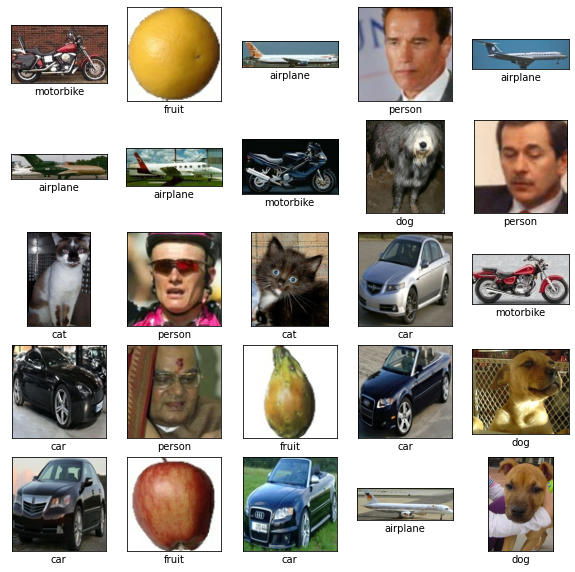

In [4]:
plt.figure(figsize=(10,10))
for i, (image, label) in enumerate(image_data.gen_dataset().unbatch().take(25)):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(image_data.index_to_label[label.numpy()])
plt.show()

In [5]:
TF_model = image_classifier.create(train_data, validation_data=validation_data)

INFO:tensorflow:Retraining the models...
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
Total params: 3,423,272
Trainable params: 10,248
Non-trainable params: 3,413,024
_________________________________________________________________
None


C:\Users\ajays\AppData\Roaming\Python\Python39\site-packages\keras\optimizer_v2\gradient_descent.py:102: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


Epoch 1/5
172/172 [==============================] - 243s 1s/step - loss: 0.6598 - accuracy: 0.9466 - val_loss: 0.5111 - val_accuracy: 0.9957
Epoch 2/5
172/172 [==============================] - 228s 1s/step - loss: 0.5184 - accuracy: 0.9976 - val_loss: 0.5016 - val_accuracy: 0.9957
Epoch 3/5
172/172 [==============================] - 227s 1s/step - loss: 0.5098 - accuracy: 0.9987 - val_loss: 0.4975 - val_accuracy: 0.9957
Epoch 4/5
172/172 [==============================] - 226s 1s/step - loss: 0.5059 - accuracy: 0.9985 - val_loss: 0.4952 - val_accuracy: 0.9957
Epoch 5/5
172/172 [==============================] - 219s 1s/step - loss: 0.5016 - accuracy: 0.9991 - val_loss: 0.4937 - val_accuracy: 0.9986


In [6]:
loss, accuracy = TF_model.evaluate(test_data)

22/22 [==============================] - 31s 1s/step - loss: 0.4930 - accuracy: 0.9986


In [7]:
TF_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2 (HubKe  (None, 1280)             3413024   
 rasLayerV1V2)                                                   
                                                                 
 dropout (Dropout)           (None, 1280)              0         
                                                                 
 dense (Dense)               (None, 8)                 10248     
                                                                 
Total params: 3,423,272
Trainable params: 10,248
Non-trainable params: 3,413,024
_________________________________________________________________


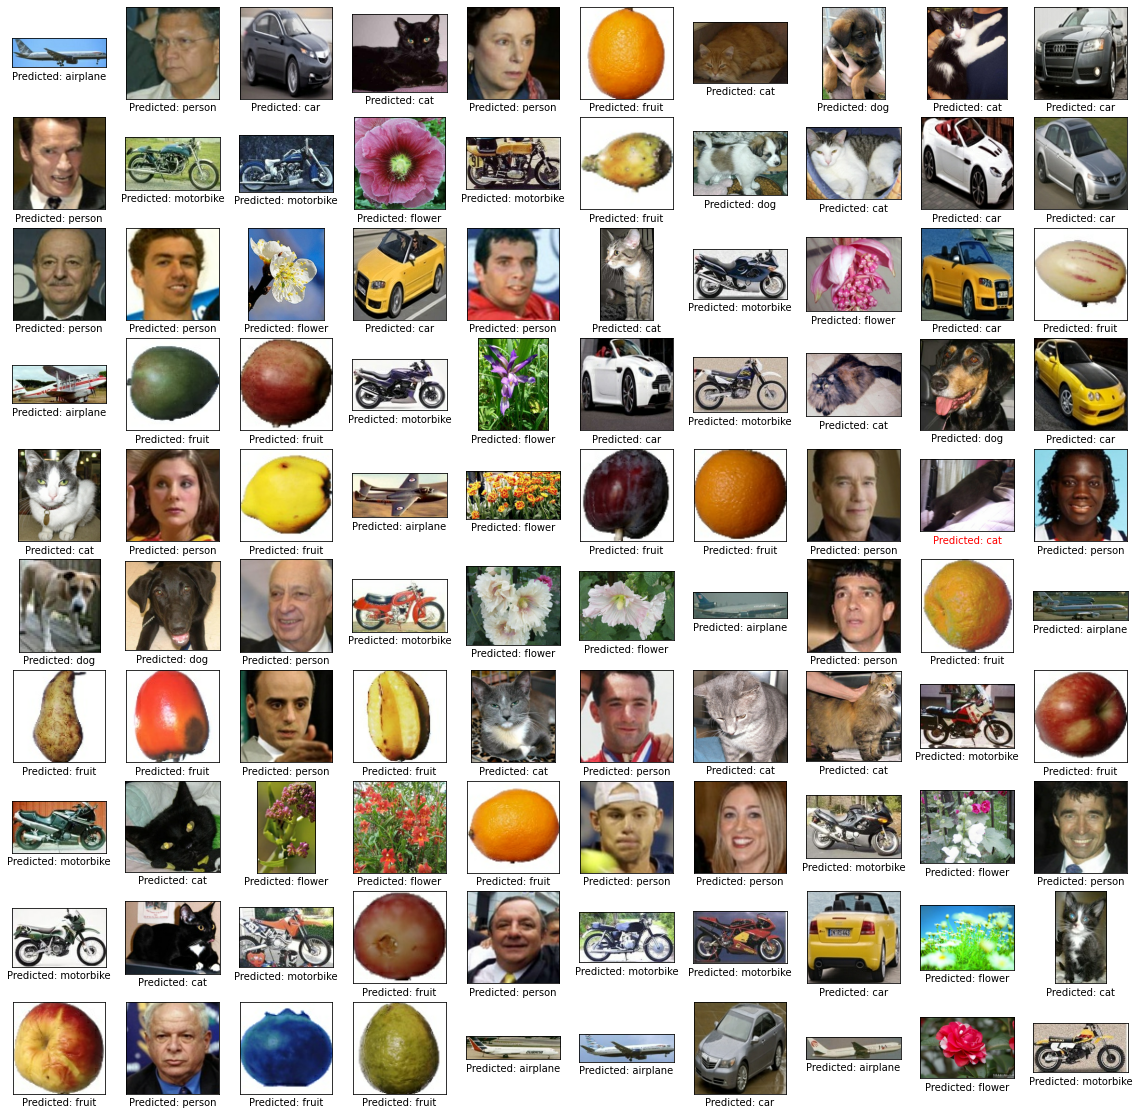

In [8]:
def get_label_color(pred, actual):
  if pred == actual:
    return 'black'
  else:
    return 'red'

plt.figure(figsize=(20, 20))
predicts = TF_model.predict_top_k(test_data)
for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(100)):
  ax = plt.subplot(10, 10, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)

  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel('Predicted: %s' % predict_label)
plt.show()


In [9]:
TF_model.export(export_dir='C:/Users/ajays/OneDrive/Desktop/Data mining/Output',tflite_filename='model.tflite',)
TF_model.export(export_dir='C:/Users/ajays/OneDrive/Desktop/Data mining/Output', export_format=ExportFormat.LABEL)

INFO:tensorflow:Assets written to: C:\Users\ajays\AppData\Local\Temp\tmpz3wr2cty\assets


INFO:tensorflow:Assets written to: C:\Users\ajays\AppData\Local\Temp\tmpz3wr2cty\assets
C:\Users\ajays\AppData\Roaming\Python\Python39\site-packages\tensorflow\lite\python\convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in C:\Users\ajays\AppData\Local\Temp\tmpvpfkr7su\labels.txt


INFO:tensorflow:Saving labels in C:\Users\ajays\AppData\Local\Temp\tmpvpfkr7su\labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: C:/Users/ajays/OneDrive/Desktop/Data mining/Output\model.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: C:/Users/ajays/OneDrive/Desktop/Data mining/Output\model.tflite


INFO:tensorflow:Saving labels in C:/Users/ajays/OneDrive/Desktop/Data mining/Output\labels.txt


INFO:tensorflow:Saving labels in C:/Users/ajays/OneDrive/Desktop/Data mining/Output\labels.txt


In [10]:
config = QuantizationConfig.for_float16()
TF_model.export(export_dir='C:/Users/ajays/OneDrive/Desktop/Data mining/Output', tflite_filename='model_fp16.tflite', quantization_config=config)

INFO:tensorflow:Assets written to: C:\Users\ajays\AppData\Local\Temp\tmp807vhjlf\assets


INFO:tensorflow:Assets written to: C:\Users\ajays\AppData\Local\Temp\tmp807vhjlf\assets


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Label file is inside the TFLite model with metadata.


INFO:tensorflow:Saving labels in C:\Users\ajays\AppData\Local\Temp\tmpoyw6kgbm\labels.txt


INFO:tensorflow:Saving labels in C:\Users\ajays\AppData\Local\Temp\tmpoyw6kgbm\labels.txt


INFO:tensorflow:TensorFlow Lite model exported successfully: C:/Users/ajays/OneDrive/Desktop/Data mining/Output\model_fp16.tflite


INFO:tensorflow:TensorFlow Lite model exported successfully: C:/Users/ajays/OneDrive/Desktop/Data mining/Output\model_fp16.tflite


In [11]:
TF_model.evaluate_tflite('C:/Users/ajays/OneDrive/Desktop/Data mining/Output/model_fp16.tflite', test_data)

{'accuracy': 0.9985507246376811}

In [13]:
# model is working absoultely well with the test images, but lets take some real world, 
#low quality and blurry images and mix them with some of the test images and test the model

low_quality_data=DataLoader.from_folder("C:/Users/ajays/OneDrive/Desktop/Data mining/test")

TF_model.evaluate_tflite('C:/Users/ajays/OneDrive/Desktop/Data mining/Output/model_fp16.tflite', low_quality_data)


INFO:tensorflow:Load image with size: 176, num_label: 8, labels: airplane, car, cat, dog, flower, fruit, motorbike, person.


INFO:tensorflow:Load image with size: 176, num_label: 8, labels: airplane, car, cat, dog, flower, fruit, motorbike, person.


{'accuracy': 0.9261363636363636}

In [32]:
import tensorflow.lite as tflite
# Load TFLite model and allocate tensors.
interpreter = tflite.Interpreter(model_path='C:/Users/ajays/OneDrive/Desktop/Data mining/Output/model.tflite')
#allocate the tensors
interpreter.allocate_tensors()

In [71]:
def my_function(rootfolder):
    dt=dict()
    for folder in os.listdir(rootfolder):
        count=0;
        f = os.path.join(rootfolder, folder)
        print(f)
        itemcount=len(os.listdir(f))
        for filename in os.listdir(f):
            filepath=os.path.join(f,filename)
            print(filepath)
            # Load TFLite model and allocate tensors.
            interpreter = tflite.Interpreter(model_path='C:/Users/ajays/OneDrive/Desktop/Data mining/Output/model.tflite')
            #allocate the tensors
            interpreter.allocate_tensors()
            input_details = interpreter.get_input_details()
            output_details = interpreter.get_output_details()
            import cv2
            import numpy as np
            img = cv2.imread(filepath)
            img = cv2.resize(img,(224,224))
            #Preprocess the image to required size and cast
            input_shape = input_details[0]['shape']
            input_tensor= np.array(np.expand_dims(img,0))
            input_index = interpreter.get_input_details()[0]["index"]
            interpreter.set_tensor(input_index, input_tensor)
            interpreter.invoke()
            output_details = interpreter.get_output_details()
            output_data = interpreter.get_tensor(output_details[0]['index'])
            pred = np.squeeze(output_data)
            highest_pred_loc = np.argmax(pred)
            class_ind = {
                         0 :'airplane',
                         1: 'car',
                         2: 'cat',
                         3: 'dog',
                         4: 'flower',
                         5: 'fruit',
                         6: 'motorbike',
                         7: 'person'
                         }
            class_name = class_ind[highest_pred_loc]
            if class_name==folder:
                count=count+1
                
        dt[folder]=count/itemcount
    return dt

In [73]:
dict=my_function('C:/Users/ajays/OneDrive/Desktop/Data mining/test/')
print(dict)

C:/Users/ajays/OneDrive/Desktop/Data mining/test/airplane
C:/Users/ajays/OneDrive/Desktop/Data mining/test/airplane\airplane_0041.jpg
C:/Users/ajays/OneDrive/Desktop/Data mining/test/airplane\airplane_0386.jpg
C:/Users/ajays/OneDrive/Desktop/Data mining/test/airplane\airplane_0387.jpg
C:/Users/ajays/OneDrive/Desktop/Data mining/test/airplane\airplane_0388.jpg
C:/Users/ajays/OneDrive/Desktop/Data mining/test/airplane\airplane_0389.jpg
C:/Users/ajays/OneDrive/Desktop/Data mining/test/airplane\airplane_0390.jpg
C:/Users/ajays/OneDrive/Desktop/Data mining/test/airplane\airplane_0399.jpg
C:/Users/ajays/OneDrive/Desktop/Data mining/test/airplane\airplane_0400.jpg
C:/Users/ajays/OneDrive/Desktop/Data mining/test/airplane\airplane_0402.jpg
C:/Users/ajays/OneDrive/Desktop/Data mining/test/airplane\airplane_0413.jpg
C:/Users/ajays/OneDrive/Desktop/Data mining/test/airplane\download (1).jpg
C:/Users/ajays/OneDrive/Desktop/Data mining/test/airplane\download (2).jpg
C:/Users/ajays/OneDrive/Desktop/

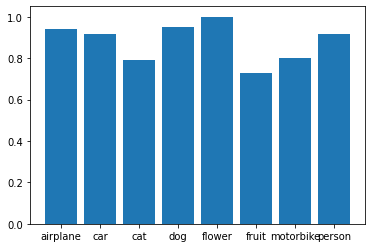

In [75]:
plt.bar(range(len(dict)), list(dict.values()), tick_label=list(dict.keys()))
plt.show()